# Introduction to GIS - Using GeoPandas

- Dennis Milechin, P.E., GISP
- <a href="http://rcs.bu.edu">Research Computing Services</a>

## Data Files
http://rcs.bu.edu/examples/gis/tutorials/python_geopandas/tut_geopandas-main.zip



In [1]:
!wget http://rcs.bu.edu/examples/gis/tutorials/python_geopandas/tutorial_files.zip

--2025-01-28 21:36:08--  http://rcs.bu.edu/examples/gis/tutorials/python_geopandas/tutorial_files.zip
Resolving rcs.bu.edu (rcs.bu.edu)... 128.197.160.76
Connecting to rcs.bu.edu (rcs.bu.edu)|128.197.160.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40896692 (39M) [application/zip]
Saving to: ‘tutorial_files.zip’

tutorial_files.zip  100%[===================>]  39.00M  21.0MB/s    in 1.9s    

2025-01-28 21:36:10 (21.0 MB/s) - ‘tutorial_files.zip’ saved [40896692/40896692]



In [2]:
!unzip tutorial_files.zip

Archive:  tutorial_files.zip
   creating: mbta_rapid_transit/
 extracting: mbta_rapid_transit/MBTA_ARC.cpg  
  inflating: mbta_rapid_transit/MBTA_ARC.dbf  
  inflating: mbta_rapid_transit/MBTA_ARC.prj  
  inflating: mbta_rapid_transit/MBTA_ARC.sbn  
  inflating: mbta_rapid_transit/MBTA_ARC.sbx  
  inflating: mbta_rapid_transit/MBTA_ARC.shp  
  inflating: mbta_rapid_transit/MBTA_ARC.shp.xml  
  inflating: mbta_rapid_transit/MBTA_ARC.shx  
 extracting: mbta_rapid_transit/MBTA_NODE.cpg  
  inflating: mbta_rapid_transit/MBTA_NODE.dbf  
  inflating: mbta_rapid_transit/MBTA_NODE.prj  
  inflating: mbta_rapid_transit/MBTA_NODE.sbn  
  inflating: mbta_rapid_transit/MBTA_NODE.sbx  
  inflating: mbta_rapid_transit/MBTA_NODE.shp  
  inflating: mbta_rapid_transit/MBTA_NODE.shp.xml  
  inflating: mbta_rapid_transit/MBTA_NODE.shx  
  inflating: mbta_rapid_transit/MBTA_Rapid_Transit.lyr  
  inflating: mbta_rapid_transit/MBTA_Rapid_Transit_9.lyr  
   creating: tlgdb_2019_a_25_ma.gdb/
  inflating: tlgd

# Workshop Outcomes

1. Learn basic concepts of GIS Theory (Data Models, Datum/Geographic Coordinate system, Projections)
1. Learn how to apply GIS concepts using GeoPandas.

# Outline

1. What is GIS?
1. Common GIS Data Models
1. Explore GeoPandas
1. Datum/Geographic Coordinate System (GCS)
1. Projections
1. Coordinate Reference System (CRS)
1. Spatial Attributes
1. Spatial Processing
1. Saving GIS Data


# 1. What is GIS?

“A geographic information system (GIS) is a system designed to capture, store, manipulate, analyze, manage, and present spatial or geographic data”

<sup>Source: https://en.wikipedia.org/wiki/Geographic_information_system</sup>


## Typical functions of GIS software

- Read/write spatial data
- Maintain spatial meta data
- Apply transformations for projections
- Visualize symbology based on attribute table
- Allow layering of data
- Tools to query/filter data
- Spatial analysis tools
- Exporting tools for printing maps or publish web maps


# 2. Common GIS Data Models

- Raster
- Vector

### Vector

<img src="https://github.com/milechin/tut_geopandas/blob/main/images/vector_data.png?raw=true" alt="compass" style="width:800px"/>    



# 3. Let's Explore GeoPandas

> GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

<sup>source: https://geopandas.org/index.html</sup>

__Note:__ GeoPandas is for processing vector data.

User Guide: https://geopandas.org/docs/user_guide.html

### GeoPandas - Dependencies

- __numpy__
- __pandas__
- __shapely__  - Spatial Operations
- __fiona__  - Reading and Writing Files
- __pyproj__ - Projection definition and transformations
- __rtree__ - spatial index to improve performance and required for overlay operations; interface to libspatialindex
- __psycopg2__ - for PostGIS connection
- __GeoAlchemy2__ - for writing to PostGIS
- __geopy__ - for geocoding
- __matplotlib__
- __mapclassify__

Source: https://geopandas.org/getting_started/install.html#dependencies

### Read Shapefile


In [3]:
import geopandas

mbta_stations = geopandas.read_file("./mbta_rapid_transit/MBTA_NODE.shp")
mbta_stations.head()

,STATION,LINE,TERMINUS,ROUTE,geometry
0,Ashmont,RED,Y,A - Ashmont C - Alewife,POINT (236007.538 892693.023)
1,Harvard,RED,N,A - Ashmont B - Braintree C - Alewife,POINT (231387.274 902684.016)
2,Kendall/MIT,RED,N,A - Ashmont B - Braintree C - Alewife,POINT (234087.917 901406.551)
3,Capen Street,RED,N,Mattapan Trolley,POINT (234055.438 890869.375)
4,Tufts Medical Center,ORANGE,N,Forest Hills to Oak Grove,POINT (235900.324 899934.313)


- "geometry" column contains spatial information.
- rows - known as "features" or "records".
- columns - known as "attributes" or "fields".

Let's look at types for each column:

In [17]:
mbta_stations.dtypes

,0
STATION,object
LINE,object
TERMINUS,object
ROUTE,object
geometry,geometry


### Plotting

<Axes: >

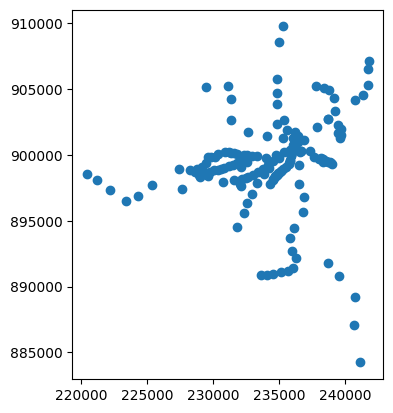

In [18]:
mbta_stations.plot()

<Axes: >

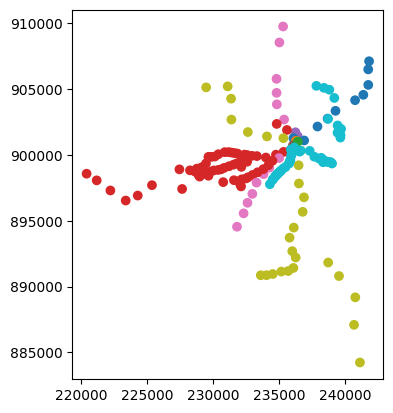

In [19]:
mbta_stations.plot(column="LINE", legend=False)

### Load Polyline Data

In [20]:
mbta_lines = geopandas.read_file("./mbta_rapid_transit/MBTA_ARC.shp")
mbta_lines.head()

,LINE,ROUTE,GRADE,SHAPE_LEN,geometry
0,SILVER,SL3,3,79.538315,"LINESTRING (238786.088 902727.2, 238786.654 90..."
1,SILVER,SL3,1,439.557315,"LINESTRING (238823.606 904952.475, 238807.669 ..."
2,SILVER,SL3,1,680.245154,"LINESTRING (237840.206 905243.356, 237838.544 ..."
3,SILVER,SL3,1,590.780545,"LINESTRING (238411.712 905095.055, 238375.464 ..."
4,SILVER,SL3,1,819.160963,"LINESTRING (239198.867 904254.943, 239205.64 9..."


In [21]:
mbta_lines.LINE.unique()

array(['SILVER', 'ORANGE', 'GREEN', 'RED', 'BLUE'], dtype=object)

<Axes: >

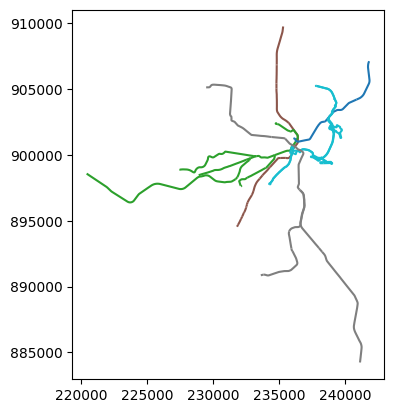

In [25]:
mbta_lines.plot(column="LINE", cmap='tab10')

### Select By Attribute

In [26]:
mbta_lines.LINE.unique()

array(['SILVER', 'ORANGE', 'GREEN', 'RED', 'BLUE'], dtype=object)

In [27]:
green_line = mbta_lines[mbta_lines["LINE"]=="GREEN"]
green_line

,LINE,ROUTE,GRADE,SHAPE_LEN,geometry
22,GREEN,D - Riverside,1,1618.957543,"LINESTRING (231830.985 898312.562, 231847.343 ..."
23,GREEN,D - Riverside,7,196.041784,"LINESTRING (231700.045 898167.952, 231711.247 ..."
24,GREEN,D - Riverside,7,199.124804,"LINESTRING (232728.037 899595.257, 232735.149 ..."
25,GREEN,C - Cleveland Circle,7,360.242405,"LINESTRING (232504.049 899629.721, 232825.127 ..."
26,GREEN,B - Boston College,7,184.396047,"LINESTRING (233089.812 899912.687, 233191.155 ..."
27,GREEN,E - Health Street,3,1132.030977,"LINESTRING (232120.839 897609.087, 232127.141 ..."
28,GREEN,E - Health Street,7,1230.956752,"LINESTRING (233995.976 899018.149, 234007.399 ..."
29,GREEN,C D,7,458.876292,"LINESTRING (232842.768 899752.366, 233178.939 ..."
30,GREEN,B C D E,7,2121.006147,"LINESTRING (234670.367 899983.643, 234771.591 ..."
32,GREEN,C E,7,1241.873692,"LINESTRING (236291.833 901071.164, 236294.248 ..."


<Axes: >

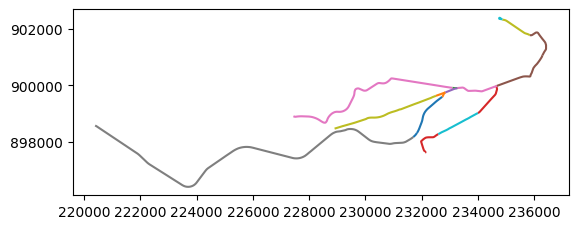

In [28]:
green_line.geometry.plot(cmap='tab10')

### Color by Attribute

<sup>This example obtained from : https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-spatial-data/customize-vector-plots/python-customize-map-legends-geopandas/</sup>


In [29]:
import matplotlib.pyplot as plt
subway_colors = {'SILVER': 'grey',
               'ORANGE': 'orange',
               'GREEN': 'green',
               'RED': 'red',
                'BLUE':'blue'}

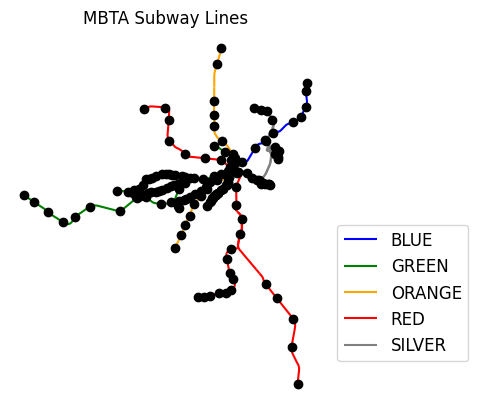

In [30]:
fig, ax = plt.subplots()
for ctype, data in mbta_lines.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color, ax=ax, label=ctype)

ax.legend(bbox_to_anchor=(1.5, .5), prop={'size': 12})
ax.set(title='MBTA Subway Lines')
ax.set_axis_off()

mbta_stations.plot(ax=ax, color="black", zorder=2)
plt.show()

### Load data from Geodatabase

- *Geodatabase* is an ESRI developed model.  Similiar open source is *GeoPackage*.
- Both act like a database and will contain multiple layers.

In [31]:
gdp_path = "./tlgdb_2019_a_25_ma.gdb"
geopandas.list_layers(gdp_path)

,name,geometry_type
0,Block,MultiPolygon
1,Census_Tract,MultiPolygon
2,County_Subdivision,MultiPolygon
3,Block_Group,MultiPolygon
4,Census_Designated_Place,MultiPolygon
5,County,MultiPolygon
6,Incorporated_Place,MultiPolygon


In [32]:
ma_block = geopandas.read_file(gdp_path, layer="Block_Group")

In [33]:
ma_block.head()

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,250010101001,Block Group 1,22251666.0,11702725.0,+42.0598291,-70.2004073,"MULTIPOLYGON (((-70.25001 42.0641, -70.24959 4..."
1,250010101002,Block Group 2,1325184.0,765208.0,+42.0620693,-70.1629235,"MULTIPOLYGON (((-70.18114 42.06232, -70.18109 ..."
2,250010101003,Block Group 3,485889.0,0.0,+42.0581234,-70.1828958,"MULTIPOLYGON (((-70.18884 42.05885, -70.18805 ..."
3,250010101004,Block Group 4,641686.0,162664.0,+42.0533919,-70.1874300,"MULTIPOLYGON (((-70.19574 42.05457, -70.19573 ..."
4,250010101005,Block Group 5,341792.0,135275.0,+42.0485956,-70.1901156,"MULTIPOLYGON (((-70.19674 42.04849, -70.1966 4..."


<Axes: >

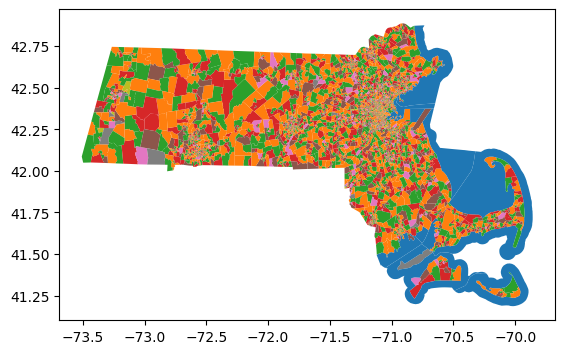

In [34]:
ma_block.plot(column="NAMELSAD")

###  Common Standards of Vector Data
1. Points, Lines, and Polygon are not mixed together in one attribute table.
    

In [35]:
print("mbta_stations")
print(mbta_stations.geometry.type.unique())

print("\nmbta_lines")
print(mbta_lines.geometry.type.unique())

print("\nma_block")
print(ma_block.geometry.type.unique())

mbta_stations
['Point']

mbta_lines
['LineString' 'MultiLineString']

ma_block
['MultiPolygon']


2. Features of similiar characteristics refered to as "layer".

  - *mbta_lines* - Only contains features and attributes of MBTA subway tracks.
  - *mbta_stations* - Only contains features and attributes of subway station stops.
  - *ma_block* - Only contains features and attributes of census block groups.

### Coordinate Reference System - CRS
Let's plot all three layers on a single map.

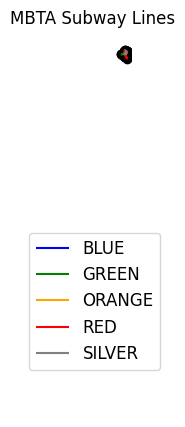

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))

for ctype, data in mbta_lines.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color, ax=ax, label=ctype)

ax.legend(bbox_to_anchor=(1.5, .5), prop={'size': 12})
ax.set(title='MBTA Subway Lines')
ax.set_axis_off()

mbta_stations.plot(ax=ax, color="black", zorder=1)  # MBTA Stations layer
ma_block.plot(ax=ax) # MA Group Block layer

plt.show()

In [37]:
print("mbta_lines CRS")
print(mbta_lines.crs)
print("\nmbta_stations CRS")
print(mbta_stations.crs)
print("\nma_block CRS")
print(ma_block.crs)

mbta_lines CRS
EPSG:26986

mbta_stations CRS
EPSG:26986

ma_block CRS
EPSG:4269


# 6. Coordinate Reference System

__Geographic coordinate system__ and __projections__ are known as Coordinate Reference System (__CRS__) in GIS.

### GeoPandas CRS Functions

<table>
<colgroup>
<col style="width: 10%" />
<col style="width: 90%" />
</colgroup>
<tbody>
<tr ><td><p><a href="https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.crs.html#geopandas.GeoDataFrame.crs">GeoDataFrame.crs</a></p></td>
<td><p>The Coordinate Reference System (CRS) represented as a pyproj.CRSobject.</p></td>
</tr>
<tr><td><p><a href="https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.to_crs.html#geopandas.GeoDataFrame.to_crs">GeoDataFrame.to_crs()</a></p></td>
<td><p>Transform geometries to a new coordinate reference system.</p></td>
</tr>
<tr><td><p><a href="https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.set_crs.html#geopandas.GeoDataFrame.set_crs">GeoDataFrame.set_crs()</a></p></td>
    <td><p>Set the Coordinate Reference System (CRS) of the GeoDataFrame. <b>### Only use if data does not have CRS defined! ###</b></p></td>
</tr>
</tbody>
</table>



### GeoPandas Accepted Definitions


- CRS WKT string
- __An authority string (i.e. “epsg:4326”)__
- __An EPSG integer code (i.e. 4326)__
- A pyproj.CRS
- An object with a to_wkt method.
- PROJ string
- Dictionary of PROJ parameters
- PROJ keyword arguments for parameters
- JSON string with PROJ parameters

<sup> source: https://geopandas.org/docs/user_guide/projections.html </sup>

### EPSG Codes

You can find library of EPSG codes at: https://spatialreference.org/

### Let's Play Around with CRS

In [38]:
world = geopandas.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


<Axes: >

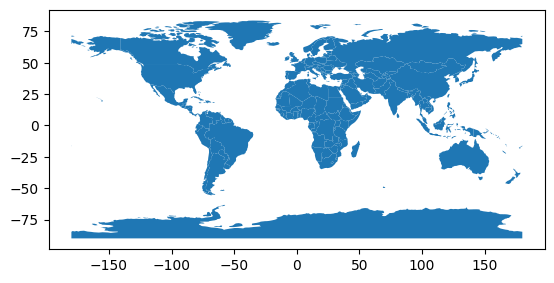

In [40]:
world.plot()

### Projections

- Lets convert to "WGS 84 / Australian Antarctic Polar Stereographic" projection.

In [41]:
world_3031 = world.to_crs("epsg:3031")
world_3031.crs

<Projected CRS: EPSG:3031>
Name: WGS 84 / Antarctic Polar Stereographic
Axis Info [cartesian]:
- E[north]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Antarctica.
- bounds: (-180.0, -90.0, 180.0, -60.0)
Coordinate Operation:
- name: Antarctic Polar Stereographic
- method: Polar Stereographic (variant B)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

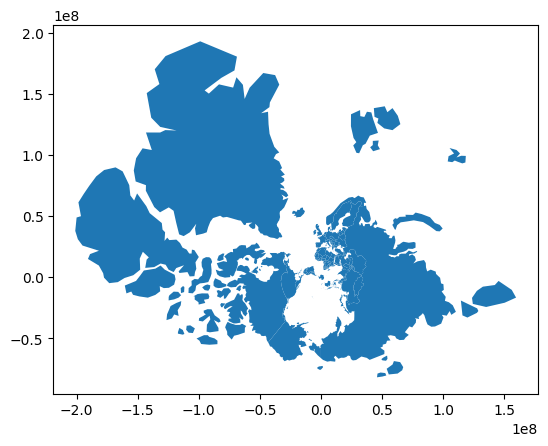

In [42]:
world_3031.plot()

<Axes: >

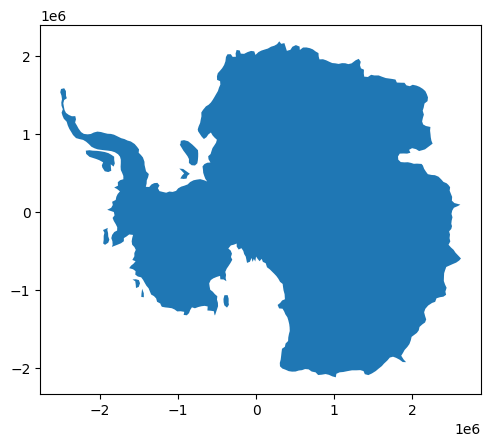

In [43]:
antartica_3031 = world_3031[world_3031["ADMIN"] == "Antarctica"]
antartica_3031.plot()

<Axes: >

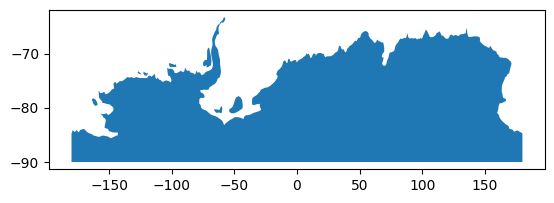

In [44]:
antartica = world[world["ADMIN"] == "Antarctica"]
antartica.plot()

# Back to our Example

In [45]:
print("mbta_lines CRS")
print(mbta_lines.crs)
print("\nmbta_stations CRS")
print(mbta_stations.crs)
print("\nma_block CRS")
print(ma_block.crs)

mbta_lines CRS
EPSG:26986

mbta_stations CRS
EPSG:26986

ma_block CRS
EPSG:4269


In [46]:
ma_block_proj = ma_block.to_crs(mbta_lines.crs)

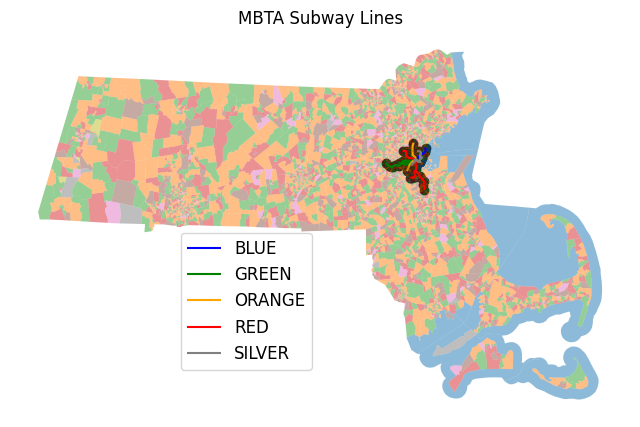

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))
for ctype, data in mbta_lines.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color,
              ax=ax,
              label=ctype)
ax.legend(bbox_to_anchor=(0.5, .5), prop={'size': 12})
ax.set(title='MBTA Subway Lines')
ax.set_axis_off()
mbta_stations.plot(ax=ax, color="black", zorder=1)
ma_block_proj.plot(ax=ax,column="NAMELSAD", alpha=0.5)
plt.show()

In [48]:
bounds = mbta_lines.to_crs("EPSG:4269").total_bounds

<Axes: >

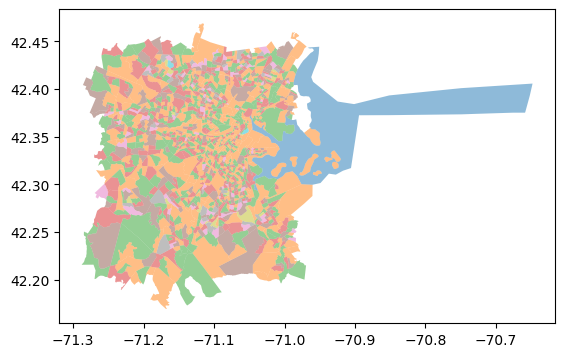

In [49]:
ma_block = geopandas.read_file(gdp_path, layer="Block_Group", bbox=tuple(bounds))
ma_block.plot(column="NAMELSAD", alpha=0.5)

In [50]:
# Need to convert to Mass Projection.
ma_block_proj = ma_block.to_crs(mbta_lines.crs)

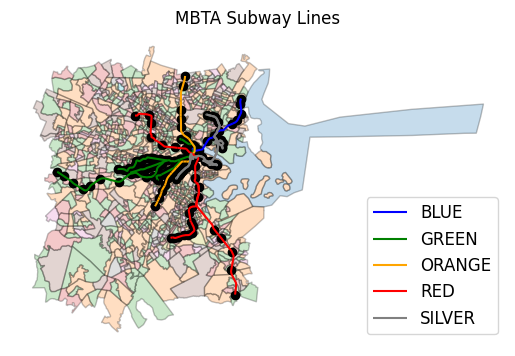

In [51]:
fig, ax = plt.subplots()
for ctype, data in mbta_lines.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color, ax=ax, label=ctype)
ax.legend(bbox_to_anchor=(1, .5), prop={'size': 12})
ax.set(title='MBTA Subway Lines')
ax.set_axis_off()
mbta_stations.plot(ax=ax, color="black", zorder=1, alpha=1)
ma_block_proj.plot(ax=ax, zorder=0, column="NAMELSAD", alpha=0.25, edgecolor="black")
plt.show()

# 7. Spatial Feature Attributes
- This is focused on just one layer.
- What is the length/area of each feature?
- What is the distance from one feature to another?

### Area

In [52]:
ma_block.columns

Index(['GEOID', 'NAMELSAD', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry'],
      dtype='object')

In [53]:
ma_block.area

<ipython-input-53-83b144e3821b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ma_block.area


,0
0,0.000314
1,0.000261
2,0.000045
3,0.000012
4,0.000017
...,...
1337,0.000085
1338,0.000231
1339,0.000278
1340,0.000125


In [54]:
ma_block.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [55]:
ma_block_proj = ma_block.to_crs("EPSG:26986")
ma_block_proj.crs

<Projected CRS: EPSG:26986>
Name: NAD83 / Massachusetts Mainland
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (meter)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [56]:
ma_block_proj.area

,0
0,2.870299e+06
1,2.384737e+06
2,4.111833e+05
3,1.107594e+05
4,1.511032e+05
...,...
1337,7.805856e+05
1338,2.114695e+06
1339,2.546468e+06
1340,1.145376e+06


In [57]:
ma_block_proj["area"] = ma_block_proj.area
ma_block_proj.head()

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area
0,250092081021,Block Group 1,1853959.0,1016489.0,+42.4436785,-70.9808120,"MULTIPOLYGON (((241361.563 909071.294, 241374....",2.870299e+06
1,250092081024,Block Group 4,2235804.0,149062.0,+42.4399938,-71.0022750,"MULTIPOLYGON (((240120.288 910027.712, 240123....",2.384737e+06
2,250173391002,Block Group 2,411205.0,0.0,+42.4261099,-71.1067042,"MULTIPOLYGON (((232070.214 908653.46, 232073.7...",4.111833e+05
3,250173394003,Block Group 3,110764.0,0.0,+42.4138334,-71.1229358,"MULTIPOLYGON (((230826.999 907197.97, 230850.8...",1.107594e+05
4,250173394004,Block Group 4,151111.0,0.0,+42.4130793,-71.1269863,"MULTIPOLYGON (((230476.023 907067.586, 230516....",1.511032e+05


What are the units of *area*?

### Perimeter

In [58]:
ma_block_proj["perimeter_m"] = ma_block_proj.length
ma_block_proj.head()

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,perimeter_m
0,250092081021,Block Group 1,1853959.0,1016489.0,+42.4436785,-70.9808120,"MULTIPOLYGON (((241361.563 909071.294, 241374....",2.870299e+06,11928.671904
1,250092081024,Block Group 4,2235804.0,149062.0,+42.4399938,-71.0022750,"MULTIPOLYGON (((240120.288 910027.712, 240123....",2.384737e+06,7448.299165
2,250173391002,Block Group 2,411205.0,0.0,+42.4261099,-71.1067042,"MULTIPOLYGON (((232070.214 908653.46, 232073.7...",4.111833e+05,2736.382141
3,250173394003,Block Group 3,110764.0,0.0,+42.4138334,-71.1229358,"MULTIPOLYGON (((230826.999 907197.97, 230850.8...",1.107594e+05,1389.491854
4,250173394004,Block Group 4,151111.0,0.0,+42.4130793,-71.1269863,"MULTIPOLYGON (((230476.023 907067.586, 230516....",1.511032e+05,2149.907041


### Centroid

In [59]:
ma_block_proj["centroid"] = ma_block_proj.centroid
ma_block_proj.head()

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,perimeter_m,centroid
0,250092081021,Block Group 1,1853959.0,1016489.0,+42.4436785,-70.9808120,"MULTIPOLYGON (((241361.563 909071.294, 241374....",2.870299e+06,11928.671904,POINT (242583.22 910396.035)
1,250092081024,Block Group 4,2235804.0,149062.0,+42.4399938,-71.0022750,"MULTIPOLYGON (((240120.288 910027.712, 240123....",2.384737e+06,7448.299165,POINT (241171.379 910077.315)
2,250173391002,Block Group 2,411205.0,0.0,+42.4261099,-71.1067042,"MULTIPOLYGON (((232070.214 908653.46, 232073.7...",4.111833e+05,2736.382141,POINT (232365.555 908473.523)
3,250173394003,Block Group 3,110764.0,0.0,+42.4138334,-71.1229358,"MULTIPOLYGON (((230826.999 907197.97, 230850.8...",1.107594e+05,1389.491854,POINT (231035.835 907103.854)
4,250173394004,Block Group 4,151111.0,0.0,+42.4130793,-71.1269863,"MULTIPOLYGON (((230476.023 907067.586, 230516....",1.511032e+05,2149.907041,POINT (230702.816 907018.625)


In [60]:
ma_block_proj.dtypes

,0
GEOID,object
NAMELSAD,object
ALAND,float64
AWATER,float64
INTPTLAT,object
INTPTLON,object
geometry,geometry
area,float64
perimeter_m,float64
centroid,geometry


Note that there are two geometry columns!

<Axes: >

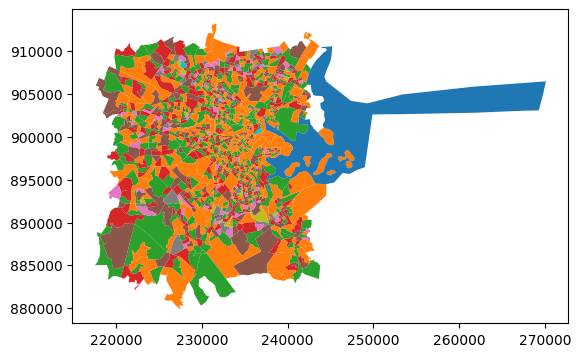

In [61]:
ma_block_proj.plot(column="NAMELSAD")

In [62]:
ma_block_proj.geometry.name

'geometry'

<Axes: >

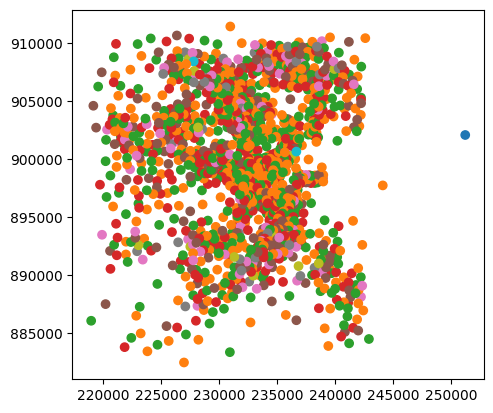

In [63]:
ma_block_proj = ma_block_proj.set_geometry('centroid')
ma_block_proj.plot(column="NAMELSAD")

In [64]:
ma_block_proj = ma_block_proj.set_geometry('geometry')

# 8. Spatial Processing
Spatial Processing allows us to ask questions regarding two layers.
- What are the nearest block groups to Kenmore Station?
- Which block groups have an MBTA station?
- Which block groups have MBTA lines that pass through them?
- Which block groups are within one mile radius of MBTA tracks?

### Distance
What are the nearest block groups to Kenmore station?

In [65]:
kenmore_station = mbta_stations.loc[mbta_stations['STATION'] == "Kenmore"]

type(kenmore_station.geometry.iloc[0])

shapely.geometry.point.Point

In [66]:
ma_block_proj["dist_to_kenmore_m"] = ma_block_proj.distance(kenmore_station.geometry.iloc[0])
ma_block_proj.head(n=3)

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,perimeter_m,centroid,dist_to_kenmore_m
0,250092081021,Block Group 1,1853959.0,1016489.0,+42.4436785,-70.9808120,"MULTIPOLYGON (((241361.563 909071.294, 241374....",2.870299e+06,11928.671904,POINT (242583.22 910396.035),12185.227824
1,250092081024,Block Group 4,2235804.0,149062.0,+42.4399938,-71.0022750,"MULTIPOLYGON (((240120.288 910027.712, 240123....",2.384737e+06,7448.299165,POINT (241171.379 910077.315),11792.403102
2,250173391002,Block Group 2,411205.0,0.0,+42.4261099,-71.1067042,"MULTIPOLYGON (((232070.214 908653.46, 232073.7...",4.111833e+05,2736.382141,POINT (232365.555 908473.523),8197.956593


<Axes: >

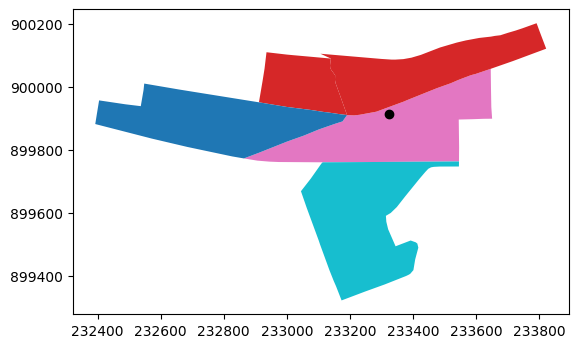

In [67]:
near_kenmore = ma_block_proj.sort_values(['dist_to_kenmore_m'], ascending=[True]).head(n=5)

base = near_kenmore.plot(column="NAMELSAD")
kenmore_station.plot(ax=base, zorder=2, color="black")

### Within
Which Census Block Groups have an MBTA Station?

In [68]:
ma_block_proj["w_station"] = ma_block_proj.geometry.apply(lambda x: mbta_stations.geometry.within(x).any())
ma_block_proj.head(n=3)

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,perimeter_m,centroid,dist_to_kenmore_m,w_station
0,250092081021,Block Group 1,1853959.0,1016489.0,+42.4436785,-70.9808120,"MULTIPOLYGON (((241361.563 909071.294, 241374....",2.870299e+06,11928.671904,POINT (242583.22 910396.035),12185.227824,False
1,250092081024,Block Group 4,2235804.0,149062.0,+42.4399938,-71.0022750,"MULTIPOLYGON (((240120.288 910027.712, 240123....",2.384737e+06,7448.299165,POINT (241171.379 910077.315),11792.403102,False
2,250173391002,Block Group 2,411205.0,0.0,+42.4261099,-71.1067042,"MULTIPOLYGON (((232070.214 908653.46, 232073.7...",4.111833e+05,2736.382141,POINT (232365.555 908473.523),8197.956593,False


<Axes: >

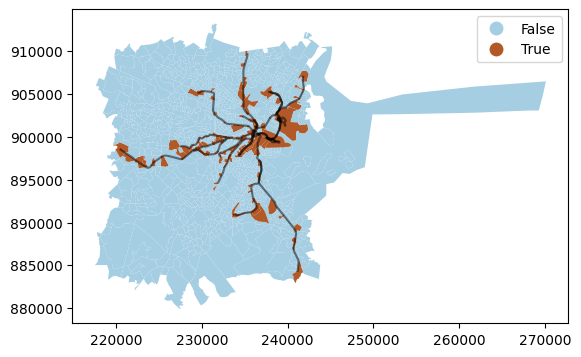

In [69]:
base = ma_block_proj.plot(column="w_station", legend=True, categorical=True, cmap="Paired")
mbta_lines.plot(ax=base, color="black", alpha=0.5)

### Spatial Join
- Joining the attributes of two layers based on their spatial location to each other.
- Spatial joins are normally done with point and polygon layers, line and polygon layers, or line and line layers.

__Contains__ - Do any points exist inside the polygon?
<img src="https://github.com/milechin/tut_geopandas/blob/main/images/sjoin_contains.png?raw=true" alt="compass" style="width:500px"/>    


Note: Since three points exist within the polygon, the ouput of this process will result in 3 identical polygons but will have different attributes representing each point.

### Example

In [70]:
print("ma_block_proj")
print(ma_block_proj.columns)
print("\nmbta_stations")
print(mbta_stations.columns)

ma_block_proj
Index(['GEOID', 'NAMELSAD', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry', 'area', 'perimeter_m', 'centroid', 'dist_to_kenmore_m',
       'w_station'],
      dtype='object')

mbta_stations
Index(['STATION', 'LINE', 'TERMINUS', 'ROUTE', 'geometry'], dtype='object')


In [74]:
blocks_w_stations = geopandas.sjoin(ma_block_proj, mbta_stations, how="inner", predicate='contains')
blocks_w_stations.head(n=2)

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,perimeter_m,centroid,dist_to_kenmore_m,w_station,index_right,STATION,LINE,TERMINUS,ROUTE
46,250173398011,Block Group 1,720396.0,196154.0,+42.4083630,-71.0768064,"MULTIPOLYGON (((234295.577 905583.857, 234315....",916496.413772,6005.014107,POINT (234821.295 906099.762),5505.650538,True,17,Wellington,ORANGE,N,Forest Hills to Oak Grove
66,250173411012,Block Group 2,151776.0,0.0,+42.4374848,-71.0725325,"MULTIPOLYGON (((235000.038 909913.443, 235039....",151765.988797,1749.280015,POINT (235171.292 909750.542),9646.668308,True,15,Oak Grove,ORANGE,Y,Forest Hills to Oak Grove


In [75]:
blocks_w_stations["LINE"].unique()

array(['ORANGE', 'RED', 'GREEN', 'GREEN/ORANGE', 'BLUE', 'BLUE/ORANGE',
       'BLUE/GREEN', 'SILVER', 'ORANGE/RED', 'GREEN/RED'], dtype=object)

In [76]:
subway_colors = {'SILVER': 'grey',
               'ORANGE': 'orange',
               'GREEN': 'green',
               'RED': 'red',
                'BLUE':'blue',
                'GREEN/ORANGE': 'yellow',
                'BLUE/GREEN': 'yellow',
                'ORANGE/RED': 'yellow',
                'GREEN/RED': 'yellow',
                'BLUE/ORANGE': 'yellow'}

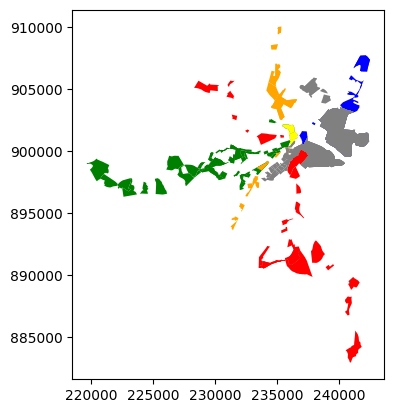

In [77]:
fig, ax = plt.subplots()
for ctype, data in blocks_w_stations.groupby('LINE'):
    color = subway_colors[ctype]
    data.plot(color=color, ax=ax, label=ctype)
plt.show()

In [ ]:
print("ma_block_proj")
print(ma_block_proj.columns)
print(ma_block_proj.shape)
print("\nmbta_stations")
print(mbta_stations.columns)
print(mbta_stations.shape)

In [ ]:
# Note to Dennis, do "right" first
blocks_w_stations = geopandas.sjoin(ma_block_proj, mbta_stations, how="left", op='contains')
print(blocks_w_stations.shape)
blocks_w_stations.columns

```python
geopandas.sjoin(ma_block_proj, mbta_stations, how= , predicate="contains")
```

__how__ options:
- __left__ - Retain all __ma_block_proj__ features and append __mbta_stations__ attributes where the result of "op" is True.
- __inner__ - Retain only __ma_block_proj__ features where the result of "op" is True and append __mbta_stations__ attributes to __ma_block_proj__ that satisfy the "op".
- __right__ - Retain all __mbta_stations__ features and append __ma_block_proj__ where the result of "op" is True.

<sup> Source: https://geopandas.org/docs/user_guide/mergingdata.html#sjoin-arguments</sup>

In [ ]:
blocks_w_stations[["GEOID", "STATION"]].groupby(by="GEOID").count().sort_values(by="STATION", ascending=False ).head(15)

In [ ]:
blocks_w_stations[blocks_w_stations["GEOID"] == "250259813002"]["STATION"]

###  Intersect
Do any line segments intersect the polygon?
<img src="https://github.com/milechin/tut_geopandas/blob/main/files/images/sjoin_intersect.png?raw=1" alt="compass" style="width:500px"/>    

What Census Group Blocks have MBTA Rapid transit tracks going through them?

<Axes: >

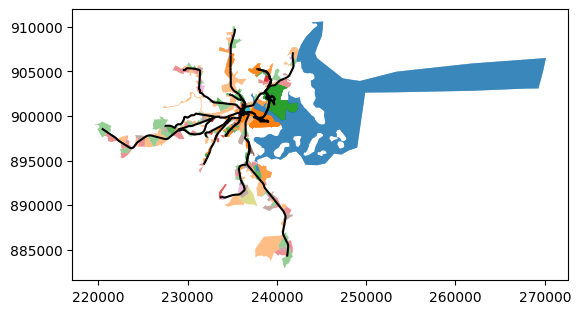

In [79]:
blocks_w_lines = geopandas.sjoin(ma_block_proj, mbta_lines, how="inner", predicate='intersects')

base = blocks_w_lines.plot(column="NAMELSAD", alpha=0.5)
mbta_lines.plot(ax=base, color="black")

GeoPandas uses the following operators:
- __contains__ -  Returns True if no points of other lie in the exterior of the object and at least one point of the interior of other lies in the interior of object.
- __crosses__ - Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.
- __disjoint__ - Returns True if the boundary and interior of the object do not intersect at all with those of the other.
- __intersects__ - Returns True if the boundary or interior of the object intersect in any way with those of the other. In other words, geometric objects intersect if they have any boundary or interior point in common.
- __overlaps__ - Returns True if the geometries have more than one but not all points in common, have the same dimension, and the intersection of the interiors of the geometries has the same dimension as the geometries themselves.
- __touches__ - Returns True if the objects have at least one point in common and their interiors do not intersect with any part of the other.
- __within__ - Returns True if the object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior).

<sup>Source: https://shapely.readthedocs.io/en/stable/manual.html?highlight=binary%20predicates#binary-predicates</sup>

### Buffer, Dissolve, Overlay
What Census Group Blocks are within 800 meters of MBTA Rapid Transit tracks?

In [80]:
mbta_lines["buffer"] = mbta_lines.buffer(800)
mbta_lines.head()

,LINE,ROUTE,GRADE,SHAPE_LEN,geometry,buffer
0,SILVER,SL3,3,79.538315,"LINESTRING (238786.088 902727.2, 238786.654 90...","POLYGON ((237988.435 902789.026, 237988.833 90..."
1,SILVER,SL3,1,439.557315,"LINESTRING (238823.606 904952.475, 238807.669 ...","POLYGON ((238408.108 904269.318, 238380.245 90..."
2,SILVER,SL3,1,680.245154,"LINESTRING (237840.206 905243.356, 237838.544 ...","POLYGON ((237777.987 904430.578, 237687.172 90..."
3,SILVER,SL3,1,590.780545,"LINESTRING (238411.712 905095.055, 238375.464 ...","POLYGON ((237918.786 904397.361, 237903.194 90..."
4,SILVER,SL3,1,819.160963,"LINESTRING (239198.867 904254.943, 239205.64 9...","POLYGON ((238341.507 904315.018, 238296.885 90..."


(138, 6)


<Axes: >

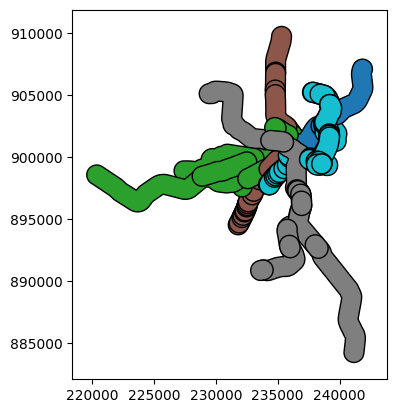

In [81]:
mbta_lines = mbta_lines.set_geometry("buffer")
print(mbta_lines.shape)
mbta_lines.plot(column="LINE", edgecolor="black")

In [85]:
mbta_buffers = mbta_lines.dissolve(by="LINE")
mbta_buffers.head()

,buffer,ROUTE,GRADE,SHAPE_LEN,geometry
LINE,,,,,
BLUE,"POLYGON ((235509.296 900732.11, 235458.685 900...",Bowdoin to Wonderland,7,3228.194293,"LINESTRING (236094.837 901277.216, 236103.496 ..."
GREEN,"POLYGON ((219831.855 898003.194, 219778.538 89...",D - Riverside,1,1618.957543,"LINESTRING (231830.985 898312.562, 231847.343 ..."
ORANGE,"POLYGON ((231233.214 895162.228, 231236.989 89...",Forest Hills to Oak Grove,7,3332.289265,"LINESTRING (235512.833 899769.829, 235512.916 ..."
RED,"POLYGON ((233640.5 891689.174, 233672.295 8916...",A - Ashmont B - Braintree C - Alewife,7,7955.708839,"LINESTRING (234435.341 901361.315, 234329.67 9..."
SILVER,"POLYGON ((235113.702 897538.164, 235100.483 89...",SL3,3,79.538315,"LINESTRING (238786.088 902727.2, 238786.654 90..."


(5, 6)


<Axes: >

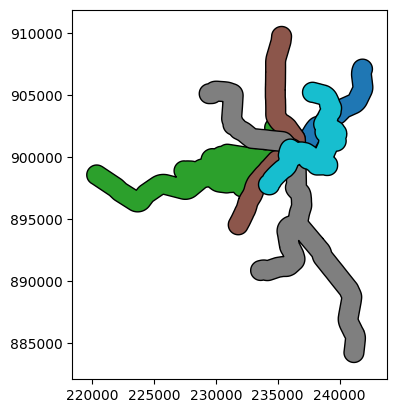

In [86]:
mbta_buffers["LINE"] = mbta_buffers.index
print(mbta_buffers.shape)
mbta_buffers.plot(edgecolor="black", column="LINE")

In [87]:
ma_block_proj.columns

Index(['GEOID', 'NAMELSAD', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry', 'area', 'perimeter_m', 'centroid', 'dist_to_kenmore_m',
       'w_station'],
      dtype='object')

In [88]:
blocks_within_buffer = geopandas.overlay(ma_block_proj, mbta_buffers, how="intersection")
blocks_within_buffer.head(n=3)

,GEOID,NAMELSAD,ALAND,AWATER,INTPTLAT,INTPTLON,area,perimeter_m,centroid,dist_to_kenmore_m,w_station,ROUTE,GRADE,SHAPE_LEN,geometry,LINE
0,250173395001,Block Group 1,542303.0,0.0,+42.4093832,-71.1183012,542272.367477,4272.212239,POINT (231419.518 906611.235),6117.678667,False,A - Ashmont B - Braintree C - Alewife,7,7955.708839,"POLYGON ((231717.456 905823.333, 231703.592 90...",RED
1,250173398012,Block Group 2,107854.0,0.0,+42.4085939,-71.0821467,107848.770762,1671.169123,POINT (234395.978 906537.509),6336.221297,False,Forest Hills to Oak Grove,7,3332.289265,"POLYGON ((234247.227 906769.948, 234331.231 90...",ORANGE
2,250173411022,Block Group 2,139346.0,0.0,+42.4300333,-71.0794948,139338.267517,1618.510044,POINT (234602.533 908920.003),8907.860815,False,Forest Hills to Oak Grove,7,3332.289265,"POLYGON ((234425.472 908961.644, 234414.661 90...",ORANGE


<Axes: >

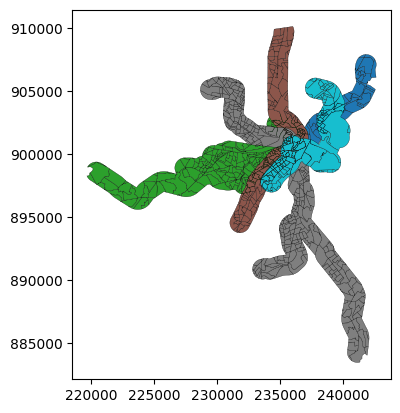

In [89]:
blocks_within_buffer.plot(column="LINE", edgecolor="black", linewidth=0.2)

In [90]:
blocks_within_buffer["area_in_buffer"] = blocks_within_buffer.area

In [91]:
blocks_within_buffer[["area", "area_in_buffer"]].head(n=3)

,area,area_in_buffer
0,542272.367477,434.009685
1,107848.770762,107848.770762
2,139338.267517,139330.493162


In [92]:
blocks_within_buffer["area_ratio"] = blocks_within_buffer["area_in_buffer"]/blocks_within_buffer["area"]
blocks_within_buffer[["area", "area_in_buffer", "area_ratio"]].head(n=3)

,area,area_in_buffer,area_ratio
0,542272.367477,434.009685,0.000800
1,107848.770762,107848.770762,1.000000
2,139338.267517,139330.493162,0.999944


More information about overlay function: https://geopandas.org/docs/user_guide/set_operations.html

### Save layers as GeoPackage


<sup>https://www.geopackage.org/</sup>

# Saving GIS Data


In [93]:
blocks_w_stations.to_file("tut_output.gpkg", driver="GPKG", layer="blocks_w_stations")

ValueError: GeoDataFrame contains multiple geometry columns but GeoDataFrame.to_file supports only a single geometry column. Use a GeoDataFrame.to_parquet or GeoDataFrame.to_feather, drop additional geometry columns or convert them to a supported format like a well-known text (WKT) using `GeoSeries.to_wkt()`.

The error is not clear, but it is complaining there are two "geometry" fields in this layer.  Most file formats only support one geometry field.

In [94]:
blocks_w_stations.dtypes

,0
GEOID,object
NAMELSAD,object
ALAND,float64
AWATER,float64
INTPTLAT,object
INTPTLON,object
geometry,geometry
area,float64
perimeter_m,float64
centroid,geometry


In [95]:
# Set the appropriate geometry column you want to save
blocks_w_stations.set_geometry("geometry", inplace=True)

# Remove the other geometry column
blocks_w_stations.drop(columns=["centroid"], inplace=True)

# Save the layer in a GeoPackage
blocks_w_stations.to_file("tut_output.gpkg", driver="GPKG", layer="blocks_w_stations")

In [98]:
geopandas.list_layers("tut_output.gpkg")

,name,geometry_type
0,blocks_w_stations,MultiPolygon


In [99]:
blocks_within_buffer.set_geometry("geometry", inplace=True)
blocks_within_buffer.drop(columns=["centroid"], inplace=True)

ma_block_proj.set_geometry("geometry", inplace=True)
ma_block_proj.drop(columns=["centroid"], inplace=True)

mbta_lines.set_geometry("geometry", inplace=True)
mbta_lines.drop(columns=["buffer"], inplace=True)

blocks_w_lines.set_geometry("geometry", inplace=True)
blocks_w_lines.drop(columns=["centroid"], inplace=True)

In [100]:
blocks_within_buffer.to_file("tut_output.gpkg", driver="GPKG", layer="blocks_within_buffer")
ma_block_proj.to_file("tut_output.gpkg", driver="GPKG", layer="ma_block_proj")
mbta_lines.to_file("tut_output.gpkg", driver="GPKG", layer="mbta_lines")
blocks_w_lines.to_file("tut_output.gpkg", driver="GPKG", layer="blocks_w_lines")

In [101]:
geopandas.list_layers("tut_output.gpkg")

,name,geometry_type
0,blocks_w_stations,MultiPolygon
1,blocks_within_buffer,MultiPolygon
2,ma_block_proj,MultiPolygon
3,mbta_lines,MultiLineString
4,blocks_w_lines,MultiPolygon


# Questions?


## Data Sources
- Mass. Census Boundary Data - https://www2.census.gov/geo/tiger/TGRGDB19/tlgdb_2019_a_25_ma.gdb.zip  
- MBTA Rapid Transit - https://www.mass.gov/info-details/massgis-data-mbta-rapid-transit
- Natural Earth Political Boundaries - https://www.naturalearthdata.com/downloads/110m-cultural-vectors/